# Electric Vehicle Routing Problem 1 -- Zielfunktion und Datenstruktur

Website des Wettbewerbs: https://mavrovouniotis.github.io/EVRPcompetition2020/

Problembeschreibung: https://mavrovouniotis.github.io/EVRPcompetition2020/TR-EVRP-Competition.pdf


Wenn Sie den Code in colab ausführen, dann müssen Sie **nichts** weiter tun: Data und Helfercode werden automatisch herunter geladen. Wenn Sie auf Ihrem eigenen Laptop arbeiten, laden Sie Daten und Helfercode unter 
* Daten: https://mavrovouniotis.github.io/EVRPcompetition2020/evrp-benchmark-set.zip
* Helfercode: https://raw.githubusercontent.com/henningbruhn/mobp/main/vrp_aufgabe/evrp.py

herunter, entpacken Sie die Daten und speichern Sie die Daten in einem Verzeichnis namens <code>data</code>. Das Verzeichnis <code>data</code> sowie <code>evrp.py</code> müssen im gleichen Verzeichnis wie dieses Notebook liegen. Kommentieren Sie schließlich die markierten Zeilen in der nächsten Zelle aus.

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time

path="data"

#### Wenn Sie den Code auf dem eigenen Laptop ausführen, kommentieren Sie die folgenden Zeilen aus ####
# download visualisation and helper code
!wget -q https://raw.githubusercontent.com/henningbruhn/mobp/main/vrp_aufgabe/evrp.py

# download and unpack instance data
!wget -q https://mavrovouniotis.github.io/EVRPcompetition2020/evrp-benchmark-set.zip
!unzip -qo evrp-benchmark-set.zip -d data
#### Ende auskommentieren ####

import evrp

Wir lesen die Instanzen ein und lassen uns die Namen der Instanzen ausgeben.

In [2]:
instances=evrp.read_in_all_instances(path)
for key in instances.keys():
    num_customers=len(instances[key].customers)
    print("{:12} -> {:4} Kunden".format(key,num_customers))

X-n573-k30   ->  573 Kunden
X-n749-k98   ->  749 Kunden
X-n1001-k43  -> 1001 Kunden
X-n214-k11   ->  214 Kunden
X-n143-k7    ->  143 Kunden
X-n819-k171  ->  819 Kunden
E-n101-k8    ->  101 Kunden
X-n916-k207  ->  916 Kunden
E-n23-k3     ->   23 Kunden
E-n51-k5     ->   51 Kunden
X-n351-k40   ->  351 Kunden
E-n33-k4     ->   33 Kunden
E-n76-k7     ->   76 Kunden
E-n30-k3     ->   30 Kunden
X-n685-k75   ->  685 Kunden
X-n459-k26   ->  459 Kunden
E-n22-k4     ->   22 Kunden


Wir picken uns eine der kleinen Instanzen heraus und lassen uns die Instanz anzeigen.

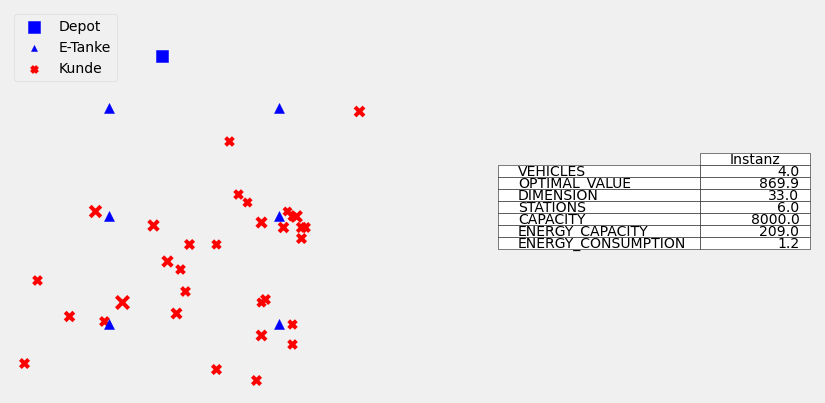

In [3]:
inst=instances['E-n33-k4']
evrp.show(inst)

Das <code>inst</code>-Objekt speichert alle Daten der Instanz. Insbesondere verfügt es über Listen <code>customers</code> und <code>stations</code>. Die Kunden und Ladestationen sind einfach durchnummeriert. Das Depot trägt die Nummer 1 und gilt ebenfalls als Ladestation.

In [4]:
print("ersten 10 Kunden: {}".format(inst.customers[:10]))
print("Ladestationen   : {}".format(inst.stations))

ersten 10 Kunden: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Ladestationen   : [34, 35, 36, 37, 38, 39, 1]


Wir können uns die 2d-Koordinaten jedes Kunden und jeder Station wie folgt ausgeben lassen (hier Station 37):

In [5]:
inst.nodes[37]

(318, 398)

## Aufgaben

* Mit welcher Datenstruktur könnte eine Lösung dargestellt werden?
* Der genetische Algorithmus braucht eine Anfangspopulation -- wie kann die erzeugt werden?
* Der genetische Algorithmus wird Lösungen produzieren, die nicht zulässig sind, weil etwa ein Lieferwagen überladen ist oder der Batterieladezustand zu niedrig für die gefahrene Strecke ist. Wie sollte die Zielfunktionen gestaltet werden, so dass auch nicht zulässige Lösungen bewertet werden können?